# Week 6: Colab Experiment

# I. Introduction
In this exercise, we apply dimension reduction methods and clustering algorithms to single-cell sequencing data.

# II. Methods
### Write Something

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Load the data and normalize the single-cell sequencing counts by total counts and log transform the counts
tasic2018 = np.load("/content/drive/My Drive/week6_colab/cell_data.npz") # Note that you need to change the path to your own

# data normalization
librarySizes = tasic2018['counts'].sum(axis=1)
CPM = tasic2018['counts'] / librarySizes.reshape(-1,1) * 1e+6
logCPM = np.log2(CPM + 1)  # results of preprocessing

In [3]:
# TODO
# Implement PCA
# Note that storing your result in X or change the plt.scatter
# X = PCA_RESULT
x_pca = PCA(n_components=2)
X = x_pca.fit_transform(logCPM)
pca_df = pd.DataFrame(data=X, columns=['PC1', 'PC2'])

In [4]:
# TODO
# Implement K-Means

k_grid = range(2,11,1)
score = []

for k in k_grid:
  # Initialize K-Means with k clusters and a fixed random state for reproducibility
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  # Fit K-Means on the PCA-reduced data
  cluster_labels = kmeans.fit_predict(X)
  # Calculate the silhouette score for the current number of clusters
  score_append = silhouette_score(X, cluster_labels)
  score.append(score_append)

## III. Results

Here we show the scatter plot of the top 2 PCs. We also show the silhouette score with respect to the number of k-means clusters.

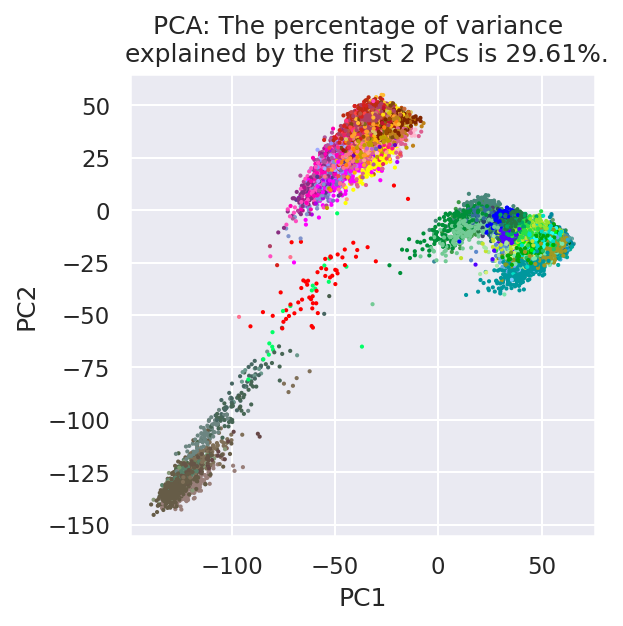

In [5]:
# Principal component analysis scatter plot
plt.figure(figsize=(4,4), dpi=150)
plt.scatter(X[:,0], X[:,1], s=1, color=tasic2018['clusterColors'][tasic2018['clusters']]) # Note that X is what you defined in PCA
plt.title(f"PCA: The percentage of variance \n explained by the first 2 PCs is {round(sum(x_pca.explained_variance_ratio_) * 100 , 2)}%.")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

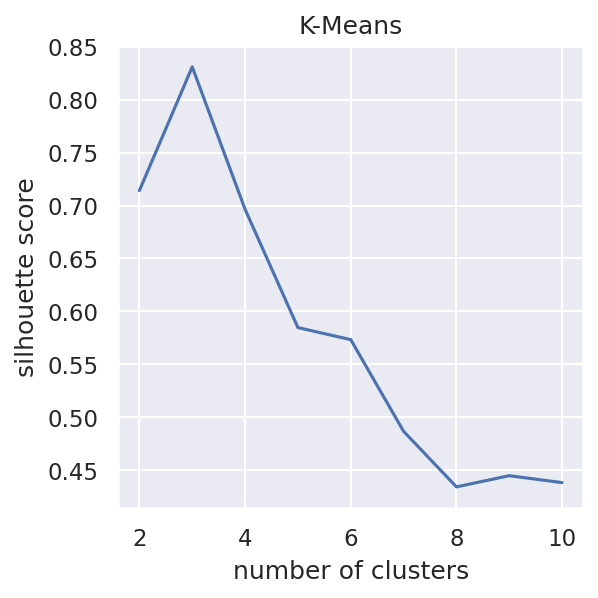

In [6]:
# k-means clustering performance
plt.figure(figsize=(4,4), dpi=150)
plt.plot(k_grid, score)
plt.title('K-Means')
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.show()

# IV. Conclusion and Discussion

### Please observe the plot image and write down your findings.

**Discussion**

這次的作業透過 PCA 進行降維及使用 K-Means 根據前兩個主成分對細胞進行分群。

1. PCA 降維


* 透過 PCA 將原始高維資料（23822 個基因和 3000 個細胞）降至 2 個維度。前兩個 principal components 的變異量約為 29.61%，這表示 PCA 有得到一部份資料中的重要數據，但是可能仍有其他重要的變異沒有被找到。
* 從 PC1 和 PC2 的散佈圖可看出不同群集有明顯分離，表示 PCA 有助於找到資料中的重要主成分。
* 雖然 PCA 有效，但它沒辦法得到變數之間的非線性關係。未來會嘗試使用非線性降維方法（如 t-SNE 或 UMAP），來找到更多資料中的資訊。


2. K-Means 分群


*  將 K-Means 用於降維後的 PCA 資料，並使用 silhouette score 來評估不同 cluster 數下的分群結果， 包含從 2 到 10 個 cluster。
*  Silhouette score 衡量的是每個點與其 cluster 內和其他 cluster 間的距離。當 k = 3 時，silhouette score 有最高值 0.85，表示 k = 3 時能最好將資料在 PCA 降維空間中分開。這個結果符合識別單細胞資料中不同 cluster 的目標，每個 cluster 可能代表不同的細胞類型或狀態。
*  當 k > 3 時，silhouette score 開始下降，表示增加更多 cluster 會降低 cluster 的緊密度和分離度，可能導致過擬合現象。


**Conclusion**


這次的作業透過 PCA 降維和 K-Means 分群來視覺化單細胞資料。根據 silhouette score，最佳的分群結果為 k=3。未來我會嘗試對這些 cluster 進行生物學驗證，並嘗試非線性方法以獲得更詳細的分析。





